# Amazon Products Reviews Sentiment Analysis

In [5]:
# get dataset from kaggle 
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
! kaggle datasets download -d datafiniti/consumer-reviews-of-amazon-products

 55% 9.00M/16.3M [00:00<00:00, 38.3MB/s]
100% 16.3M/16.3M [00:00<00:00, 53.5MB/s]


In [6]:
! unzip consumer-reviews-of-amazon-products.zip

Archive:  consumer-reviews-of-amazon-products.zip
  inflating: 1429_1.csv              
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv  
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  


In [137]:
import pandas as pd 

df = pd.read_csv("1429_1.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [138]:
df.shape

(34660, 21)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [140]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

### select relavent featurs

In [141]:
df = df[['reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.text', 'reviews.title']]
df.columns = ['reviews_doRecommend', 'reviews_numHelpful', 'reviews_rating', 'reviews_text', 'reviews_title']
df.head()

,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title
0,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle
1,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast
2,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


## Processing the data

### remove NULL values

In [142]:
df.isnull().sum()

reviews_doRecommend    594
reviews_numHelpful     529
reviews_rating          33
reviews_text             1
reviews_title            5
dtype: int64

In [143]:
df.dropna(inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34061 entries, 0 to 34624
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   reviews_doRecommend  34061 non-null  object 
 1   reviews_numHelpful   34061 non-null  float64
 2   reviews_rating       34061 non-null  float64
 3   reviews_text         34061 non-null  object 
 4   reviews_title        34061 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.6+ MB



### replace all non numarical values with numarical value

In [145]:
df['reviews_doRecommend'].replace({True: 1, False: 0}, inplace=True)
df.head()

,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title
0,1,0.0,5.0,This product so far has not disappointed. My c...,Kindle
1,1,0.0,5.0,great for beginner or experienced person. Boug...,very fast
2,1,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,1,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,1,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [146]:
import numpy as np
np.unique(df.reviews_rating)

array([1., 2., 3., 4., 5.])

In [147]:
threshold_rating = 3
ratings = df['reviews_rating'].values
ratings[ratings <= threshold_rating] = 0 
ratings[ratings > threshold_rating] = 1
df['reviews_rating'] = ratings
df.head()

,reviews_doRecommend,reviews_numHelpful,reviews_rating,reviews_text,reviews_title
0,1,0.0,1.0,This product so far has not disappointed. My c...,Kindle
1,1,0.0,1.0,great for beginner or experienced person. Boug...,very fast
2,1,0.0,1.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,1,0.0,1.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,1,0.0,1.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


### preprocess the text

In [148]:
DataX = np.array(df['reviews_text'])
DataY = np.array(df['reviews_rating'])

In [149]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

import re
from bs4 import BeautifulSoup

def review_to_words(review):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    
    return words

In [150]:
print(DataX[100])
print(DataY[100])

I purchased 2 of these tablets for my 6 and 8 year old. They were a Black Friday special for $59. They are perfect for the apps and games they wanted.
1.0


In [151]:
words = [review_to_words(review) for review in DataX]

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000, preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
features_train = vectorizer.fit_transform(words).toarray()

### spliting the data

In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_train, DataY, test_size = 0.3) 

### NB Model

In [154]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, confusion_matrix


In [155]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train, y_train) 
nb_predictions = naive_bayes.predict(x_test)

Accuracy: 0.9306194343869263
Precision: 0.9590291463541126
Recall: 0.9671548117154811
F1: 0.963074839852091
              precision    recall  f1-score   support

         0.0       0.46      0.40      0.43       659
         1.0       0.96      0.97      0.96      9560

    accuracy                           0.93     10219
   macro avg       0.71      0.68      0.69     10219
weighted avg       0.93      0.93      0.93     10219

Accuracy (testing): 0.9306194343869263


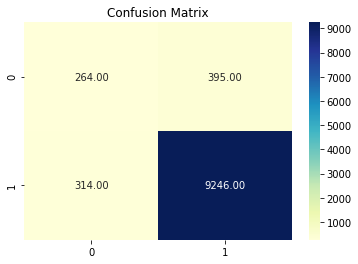

In [156]:
# Calculate accuracy
accuracy = accuracy_score(y_test, nb_predictions)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(y_test, nb_predictions)
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(y_test, nb_predictions)
print(f'Recall: {recall}')

# Calculate f1
f1 = f1_score(y_test, nb_predictions)
print(f'F1: {f1}')

# report
print(classification_report(y_test, nb_predictions))
print("Accuracy (testing):", accuracy_score(y_test, nb_predictions))

confusion_matrix = confusion_matrix(y_test, nb_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix'); 

### XGBoost Model

In [157]:
gb_classifier = XGBClassifier()
gb_classifier.fit(x_train, y_train)
gb_predictions = gb_classifier.predict(x_test)


Accuracy: 0.9386437029063509
Precision: 0.9409615954190937
Recall: 0.9969665271966527
F1: 0.9681548072527808
              precision    recall  f1-score   support

         0.0       0.68      0.09      0.16       659
         1.0       0.94      1.00      0.97      9560

    accuracy                           0.94     10219
   macro avg       0.81      0.54      0.57     10219
weighted avg       0.92      0.94      0.92     10219

Accuracy (testing): 0.9386437029063509


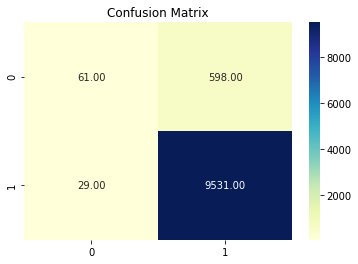

In [161]:
from sklearn.metrics import confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, gb_predictions)
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(y_test, gb_predictions)
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(y_test, gb_predictions)
print(f'Recall: {recall}')

# Calculate f1
f1 = f1_score(y_test, gb_predictions)
print(f'F1: {f1}')

# report
print(classification_report(y_test, gb_predictions))
print("Accuracy (testing):", accuracy_score(y_test, gb_predictions))

confusion_matrix = confusion_matrix(y_test, gb_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix'); 